<a href="https://colab.research.google.com/github/shumshersubashgautam/Graph-Neural-Network-Pytorch/blob/main/Graph_Neural_Nets_with_JAX_jraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install git+https://github.com/deepmind/jraph.git
!pip install flax
!pip install dm-haiku

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/deepmind/jraph.git to /tmp/pip-req-build-cp8kxvnj
  Running command git clone --filter=blob:none --quiet https://github.com/deepmind/jraph.git /tmp/pip-req-build-cp8kxvnj
  Resolved https://github.com/deepmind/jraph.git to commit 51f5990104f7374492f8f3ea1cbc47feb411c69c
  Preparing metadata (setup.py) ... done
  Created wheel for jraph: filename=jraph-0.0.6.dev0-py3-none-any.whl size=91255 sha256=014f9175adbcd0a357e3857bd25485ba036a696e5dc318b7befdb5906dcd8f76
  Stored in directory: /tmp/pip-ephem-wheel-cache-fe1zw4h4/wheels/76/61/34/8fb9aa4dac00d471de4a5f7157614181de683c445fc2d640db
Successfully built jraph
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 kB

# **Fundamental Graph Concepts**
# **Graph Prediction Tasks**
# Intro to the jraph Library
# Graph Convolutional Network (GCN) Layer
# Build GCN Model with Multiple Layers
# Node Classification with GCN on Karate Club Dataset
# Graph Attention (GAT) Layer
# Train GAT Model on Karate Club Dataset
# Graph Classification on MUTAG (Molecules)
# Link Prediction on CORA (Citation Network)
# EXTRA: Intro to Graph Adversarial Attacks

In [23]:
# Import the NetworkX package
import networkx as nx

# **Graph**
NetworkX provides several classes to store different types of graphs, such as directed and undirected graph. It also provides classes to create multigraphs (both directed and undirected).

For more information, please refer to NetworkX graph types.

In [24]:
# Create an undirected graph G
G = nx.Graph()
print(G.is_directed())

# Create a directed graph H
H = nx.DiGraph()
print(H.is_directed())

# Add graph level attribute
G.graph["Name"] = "Bar"
print(G.graph)

False
True
{'Name': 'Bar'}


**Node**
Nodes (with attributes) can be easily added to NetworkX graphs.

In [25]:
# Add one node with node level attributes
G.add_node(0, feature=5, label=0)

# Get attributes of the node 0
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 5, 'label': 0}


In [26]:
# Add multiple nodes with attributes
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
]) #(node, attrdict)

# Loop through all the nodes
# Set data=True will return node attributes
for node in G.nodes(data=True):
  print(node)

# Get number of nodes
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(0, {'feature': 5, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


# **Edge**
Similar to nodes, edges (with attributes) can also be easily added to NetworkX graphs.

In [27]:
# Add one edge with edge weight 0.5
G.add_edge(0, 1, weight=0.5)

# Get attributes of the edge (0, 1)
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [28]:
# Add multiple edges with edge weights
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1})
])

# Loop through all the edges
# Here there is no data=True, so only the edge will be returned
for edge in G.edges():
  print(edge)

# Get number of edges
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

(0, 1)
(0, 2)
(1, 2)
G has 3 edges


# **Visualization**

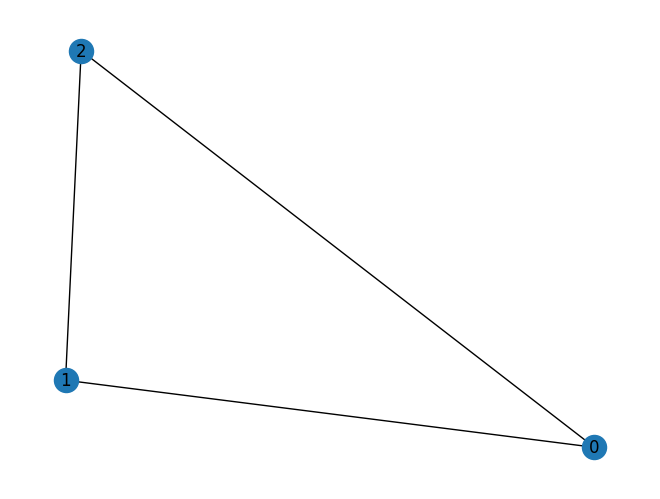

In [29]:
# Draw the graph
nx.draw(G, with_labels = True)

**Node Degree and Neighbor**

In [31]:
node_id = 1

# Degree of node 1
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# Get neighbor of node 1
for neighbor in G.neighbors(node_id):
  print("Node {} has neighbor {}".format(node_id, neighbor))


Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


{0: 0.17857162031103999,
 1: 0.32142837968896,
 2: 0.32142837968896,
 3: 0.17857162031103999}

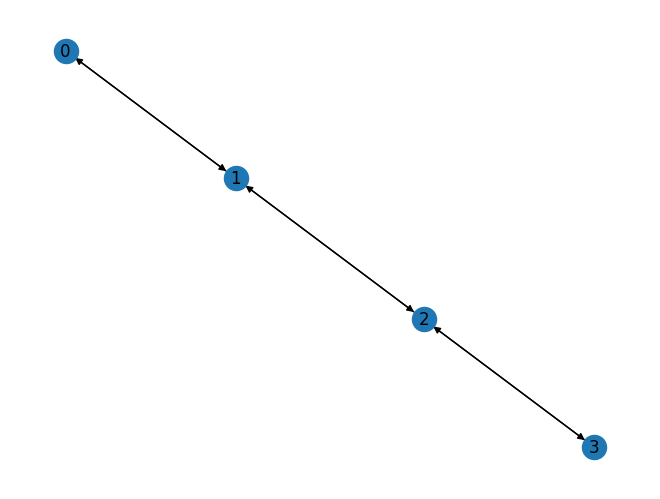

In [32]:
num_nodes = 4
# Create a new path like graph and change it to a directed graph
G = nx.DiGraph(nx.path_graph(num_nodes))
nx.draw(G, with_labels = True)

# Get the PageRank
pr = nx.pagerank(G, alpha=0.8)
pr

# **PyTorch Geometric Tutorial**
PyTorch Geometric (PyG) is an extension library for PyTorch. It provides useful primitives to develop Graph Deep Learning models, including various graph neural network layers and a large number of benchmark datasets.

In [33]:
import torch
print("PyTorch has version {}".format(torch.__version__))

PyTorch has version 2.0.1+cu118


# **Visualization**

In [34]:
# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

# Visualization function for NX graph or PyTorch tensor
def visualize(h, color, epoch=None, loss=None, accuracy=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None and accuracy['train'] is not None and accuracy['val'] is not None:
            plt.xlabel((f'Epoch: {epoch}, Loss: {loss.item():.4f} \n'
                       f'Training Accuracy: {accuracy["train"]*100:.2f}% \n'
                       f' Validation Accuracy: {accuracy["val"]*100:.2f}%'),
                       fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

# **Introduction**
Recently, deep learning on graphs has emerged to one of the hottest research fields in the deep learning community. Here, Graph Neural Networks (GNNs) aim to generalize classical deep learning concepts to irregular structured data (in contrast to images or texts) and to enable neural networks to reason about objects and their relations.

This tutorial will introduce you to some fundamental concepts regarding deep learning on graphs via Graph Neural Networks based on the PyTorch Geometric (PyG) library. PyTorch Geometric is an extension library to the popular deep learning framework PyTorch, and consists of various methods and utilities to ease the implementation of Graph Neural Networks.

Following Kipf et al. (2017), let's dive into the world of GNNs by looking at a simple graph-structured example, the well-known Zachary's karate club network. This graph describes a social network of 34 members of a karate club and documents links between members who interacted outside the club. Here, we are interested in detecting communities that arise from the member's interaction.

**Dataset**

PyTorch Geometric provides an easy access to the dataset via the torch_geometric.datasets subpackage:



In [35]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


After initializing the KarateClub dataset, we first can inspect some of its properties. For example, we can see that this dataset holds exactly one graph, and that each node in this dataset is assigned a 34-dimensional feature vector (which uniquely describes the members of the karate club). Furthermore, the graph holds exactly 4 classes, which represent the community each node belongs to.

Let's now look at the underlying graph in more detail:

In [36]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {(2*data.num_edges) / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.has_isolated_nodes()}')
print(f'Contains self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 9.18
Number of training nodes: 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


In [37]:
data.edge_index.T

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

Data
Each graph in PyTorch Geometric is represented by a single Data object, which holds all the information to describe its graph representation. We can print the data object anytime via print(data) to receive a short summary about its attributes and their shapes:

Data(edge_index=[2, 156], x=[34, 34], y=[34], train_mask=[34])
We can see that this data object holds 4 attributes: (1) The edge_index property holds the information about the graph connectivity, i.e., a tuple of source and destination node indices for each edge. PyG further refers to (2) node features as x (each of the 34 nodes is assigned a 34-dim feature vector), and to (3) node labels as y (each node is assigned to exactly one class). (4) There also exists an additional attribute called train_mask, which describes for which nodes we already know their community assigments. In total, we are only aware of the ground-truth labels of 4 nodes (one for each community), and the task is to infer the community assignment for the remaining nodes.

The data object also provides some utility functions to infer some basic properties of the underlying graph. For example, we can easily infer whether there exists isolated nodes in the graph (i.e. there exists no edge to any node), whether the graph contains self-loops (i.e.,
), or whether the graph is undirected (i.e., for each edge
 there also exists the edge
).

In [38]:
print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


Edge Index
Next we'll print the edge_index of our graph:

In [39]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

edge_index = data.edge_index
print(edge_index.t())

<IPython.core.display.Javascript object>

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

By printing edge_index, we can further understand how PyG represents graph connectivity internally. We can see that for each edge, edge_index holds a tuple of two node indices, where the first value describes the node index of the source node and the second value describes the node index of the destination node of an edge.

This representation is known as the COO format (coordinate format) commonly used for representing sparse matrices. Instead of holding the adjacency information in a dense representation
, PyG represents graphs sparsely, which refers to only holding the coordinates/values for which entries in
 are non-zero.

We can further visualize the graph by converting it to the networkx library format, which implements, in addition to graph manipulation functionalities, powerful tools for visualization:

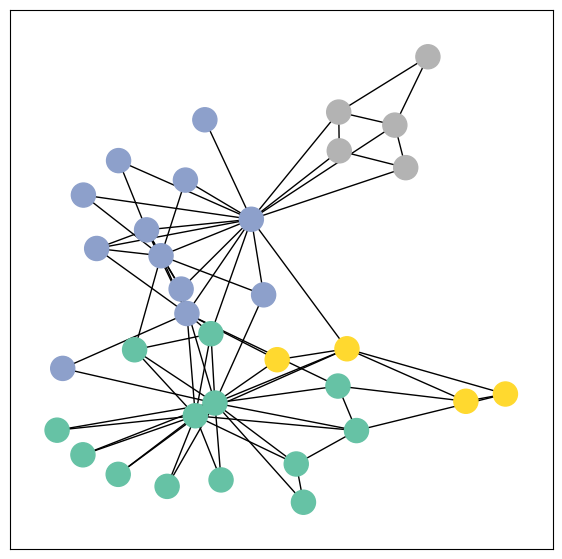

In [40]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

# **Implementing Graph Neural Networks (GNNs)**
After learning about PyG's data handling, it's time to implement our first Graph Neural Network!

For this, we will use one of the most simple GNN operators, the GCN layer (Kipf et al. (2017)).

PyG implements this layer via GCNConv, which can be executed by passing in the node feature representation x and the COO graph connectivity representation edge_index.

**What is the output of a GNN?**
The goal of a GNN is to take an input graph
 where each node
 has an input feature vector
. What we want to learn is a function
, a function that takes in a node and its feature vector, as well as the graph structure, and outputs an embedding, a vector that represents that node in a way that's useful to our downstream task. Once we've mapped nodes and their initial features to their learned embeddings, we can use those embeddings to do a variety of different tasks including node-level, edge-level, or graph-level regression/classification.

In this colab, we want to learn embeddings that will be useful to classify each node into its community.

With this, we are ready to create our first Graph Neural Network by defining our network architecture in a torch.nn.Module class:

In [42]:
# import torch
# from torch.nn import Linear
# from torch_geometric.nn import GCNConv

# class GCN(torch.nn.Module):
#     def __init__(self):
#         super(GCN, self).__init__()
#         torch.manual_seed(12345)
#         self.classifier = Linear(2, dataset.num_classes)

#         self.convs = torch.nn.ModuleList()

#         self.convs.append(GCNConv(input_dim, hidden_dim))
#         for l in range(num_layers-1):
#           self.convs.append(GCNConv(hidden_dim, hidden_dim))

#         self.relu = torch.nn.ReLU()

#     def forward(self, x, edge_index):

#         for l in range(num_layers):
#           x = self.convs[l](x, edge_index)
#           x = x.tanh()

#         #h = self.relu(h)
#         h = torch.nn.functional.relu(h)
#         h = torch.nn.functional.dropout(h, dropout=0.5, training=self.training)
#         h = self.conv3(h, edge_index)
#         embeddings = h.tanh()  # Final GNN embedding space.

#         # Apply a final (linear) classifier.
#         out = self.classifier(embeddings)

#         return out, embeddings

# model = GCN()
# print(model)

NameError: ignored